<a href="https://colab.research.google.com/github/nandinib1999/edureka-assignments/blob/main/Demo_Genrative_Adversarial_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Classifying Handwritten digits using Tensorflow 2.x**

This is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook file. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. Run all the notebook code cells: Select *Runtime* > *Run all*.

##**Problem Statement**

**MNIST ("Modified National Institute of Standards and Technology")** is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this demo, your goal is to correctly identify digits from a dataset of thousands of handwritten images. 

##**Tasks to be Performed**

In this tutorial you will be performing the following tasks:
- Prepare the dataset for the model
- Install Tensorflow 2.x
- Develop Generative Adversarial Network (GAN) model for classifying the handwritten digits
- Plot the change in accuracy per epochs
- Evaluate the model on the testing data
- Analyse the model summary
- Add Dropout to prevent overfitting and check its effect on accuracy
- Increasing the number of Hidden Layer neuron and check its effect on accuracy
- Use  optimizers and loss optimizer to check its effect on accuracy
- Increase the hidden layers and check its effect on accuracy
- Manipulate the batch_size and epochs and check its effect on accuracy
- Answer: What parameters should be choosen to get best accuracy on classifying the handwritten digits?

##**Dataset Description**


The **[MNIST Handwritten Digit Classification Dataset](http://yann.lecun.com/exdb/mnist/)** consists of 60,000 training images and 10,000 testing images of handwritten digits.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

![alt text](https://i.imgur.com/Su00XUA.png)



##**Skills Gained**

- TensorFlow 2.x
- Generative Adversarial Network
- Model Improvisation

##Solution: Classifying Handwritten digits using Tensorflow 2.x



##Installing TensorFlow 2.x

In [ ]:
# !pip install tensorflow

In [ ]:
#verify the installation
import tensorflow as tf
from tensorflow import keras 

#Check tf.keras version
print(tf.keras.__version__)


2.4.0


##Import Libraries

In [ ]:
import tensorflow as tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation,BatchNormalization
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import numpy as np
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam


##Preparing the Data

###Loading the Data

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) and convert the samples from integers to floating-point numbers and deal with categorical data:

In [ ]:
# Loading MNIST dataset
mnist = keras.datasets.mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


###Data Preprocessing

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

In [ ]:
# X_train is 60000 rows of 28x28 values; we reshape it to # 60000 x 784. 
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)
(X_train, y_train,X_test, y_test)=load_data()
print(X_train.shape)

(60000, 784)


## Designing the Model

### <b> Build the basic Generative Adversarial Model 

<b> Architecture of GAN</b>

Main two parts are there in GAN
1.   Generator
2.   Discriminator

![alt text](https://i.imgur.com/Fg891TJ.png)



####Preparing the Model 0: Generative Adversarial network

#### <b>Part 1: Generator 

In [ ]:
def build_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer= 'adam')
    return generator
g=build_generator()
g.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               8

#### <b>Part 2: Discriminator

In [ ]:
def build_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy',optimizer= 'adam')
    return discriminator
d =build_discriminator()
d.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

#### <b>Part 3: Combined the Generator and Discriminator

- Create the GAN where Generator and Discriminator will be combined.
-  When we train the generator we will freeze the Discriminator.
- We will input the noised image of shape 100 units to the Generator.
- The output generated from the Generator will be fed to the Discriminator.

In [ ]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan= Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan
gan = create_gan(d,g)
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 784)               1486352   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


#### <b>Part 4: Visualize the images created by GAN

- Plot_generated_images to plot the generated images
- Can observe how the images are generated
- Save the generated images to file to view later

In [ ]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' %epoch)

#### <b>Part 5: Train the model and print the output

  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 1


  2%|▏         | 3/128 [00:00<00:05, 23.55it/s]

Epoch 2


  2%|▏         | 3/128 [00:00<00:05, 23.81it/s]

Epoch 3


  2%|▏         | 3/128 [00:00<00:05, 21.45it/s]

Epoch 4


  2%|▏         | 3/128 [00:00<00:05, 23.69it/s]

Epoch 5


  2%|▏         | 3/128 [00:00<00:05, 22.29it/s]

Epoch 6


  2%|▏         | 3/128 [00:00<00:05, 23.99it/s]

Epoch 7


  2%|▏         | 3/128 [00:00<00:05, 23.40it/s]

Epoch 8


  2%|▏         | 3/128 [00:00<00:05, 23.45it/s]

Epoch 9


  2%|▏         | 3/128 [00:00<00:05, 24.28it/s]

Epoch 10


  2%|▏         | 3/128 [00:00<00:05, 23.54it/s]

Epoch 11


  2%|▏         | 3/128 [00:00<00:05, 23.34it/s]

Epoch 12


  2%|▏         | 3/128 [00:00<00:05, 21.63it/s]

Epoch 13


  2%|▏         | 3/128 [00:00<00:05, 24.65it/s]

Epoch 14


  2%|▏         | 3/128 [00:00<00:05, 20.91it/s]

Epoch 15


  2%|▏         | 3/128 [00:00<00:05, 20.89it/s]

Epoch 16


  2%|▏         | 3/128 [00:00<00:05, 22.89it/s]

Epoch 17


  2%|▏         | 3/128 [00:00<00:05, 24.41it/s]

Epoch 18


  2%|▏         | 3/128 [00:00<00:05, 23.74it/s]

Epoch 19


  2%|▏         | 3/128 [00:00<00:05, 24.25it/s]

Epoch 20


  2%|▏         | 3/128 [00:00<00:05, 22.54it/s]

Epoch 21


  2%|▏         | 3/128 [00:00<00:05, 23.58it/s]

Epoch 22


  2%|▏         | 3/128 [00:00<00:05, 22.45it/s]

Epoch 23


  2%|▏         | 3/128 [00:00<00:05, 20.91it/s]

Epoch 24


  2%|▏         | 3/128 [00:00<00:05, 23.91it/s]

Epoch 25


  2%|▏         | 3/128 [00:00<00:05, 24.26it/s]

Epoch 26


  2%|▏         | 3/128 [00:00<00:05, 24.32it/s]

Epoch 27


  2%|▏         | 3/128 [00:00<00:05, 23.92it/s]

Epoch 28


  2%|▏         | 3/128 [00:00<00:05, 23.22it/s]

Epoch 29


  2%|▏         | 3/128 [00:00<00:05, 24.21it/s]

Epoch 30


  2%|▏         | 3/128 [00:00<00:05, 23.58it/s]

Epoch 31


  2%|▏         | 3/128 [00:00<00:05, 23.15it/s]

Epoch 32


  2%|▏         | 3/128 [00:00<00:05, 24.09it/s]

Epoch 33


  2%|▏         | 3/128 [00:00<00:05, 23.90it/s]

Epoch 34


  2%|▏         | 3/128 [00:00<00:05, 20.93it/s]

Epoch 35


  2%|▏         | 3/128 [00:00<00:05, 21.19it/s]

Epoch 36


  2%|▏         | 3/128 [00:00<00:05, 23.49it/s]

Epoch 37


  2%|▏         | 3/128 [00:00<00:05, 22.87it/s]

Epoch 38


  2%|▏         | 3/128 [00:00<00:05, 22.72it/s]

Epoch 39


  2%|▏         | 3/128 [00:00<00:05, 23.49it/s]

Epoch 40


  2%|▏         | 3/128 [00:00<00:05, 23.32it/s]

Epoch 41


  2%|▏         | 3/128 [00:00<00:05, 24.19it/s]

Epoch 42


  2%|▏         | 2/128 [00:00<00:06, 19.58it/s]

Epoch 43


  2%|▏         | 3/128 [00:00<00:05, 22.87it/s]

Epoch 44


  2%|▏         | 3/128 [00:00<00:05, 23.59it/s]

Epoch 45


  2%|▏         | 3/128 [00:00<00:05, 22.33it/s]

Epoch 46


  2%|▏         | 3/128 [00:00<00:05, 22.24it/s]

Epoch 47


  2%|▏         | 3/128 [00:00<00:05, 24.09it/s]

Epoch 48


  2%|▏         | 3/128 [00:00<00:06, 20.62it/s]

Epoch 49


  2%|▏         | 3/128 [00:00<00:05, 22.28it/s]

Epoch 50


  2%|▏         | 3/128 [00:00<00:05, 22.48it/s]

Epoch 51


  2%|▏         | 3/128 [00:00<00:05, 21.88it/s]

Epoch 52


  2%|▏         | 3/128 [00:00<00:05, 23.08it/s]

Epoch 53


  2%|▏         | 3/128 [00:00<00:05, 23.48it/s]

Epoch 54


  2%|▏         | 3/128 [00:00<00:05, 21.27it/s]

Epoch 55


  2%|▏         | 3/128 [00:00<00:05, 23.83it/s]

Epoch 56


  2%|▏         | 3/128 [00:00<00:05, 22.02it/s]

Epoch 57


  2%|▏         | 3/128 [00:00<00:05, 23.74it/s]

Epoch 58


  2%|▏         | 3/128 [00:00<00:05, 22.74it/s]

Epoch 59


  2%|▏         | 3/128 [00:00<00:05, 21.94it/s]

Epoch 60


  2%|▏         | 3/128 [00:00<00:05, 23.02it/s]

Epoch 61


  2%|▏         | 3/128 [00:00<00:05, 22.79it/s]

Epoch 62


  2%|▏         | 3/128 [00:00<00:05, 24.05it/s]

Epoch 63


  2%|▏         | 3/128 [00:00<00:05, 22.73it/s]

Epoch 64


  2%|▏         | 3/128 [00:00<00:05, 24.02it/s]

Epoch 65


  2%|▏         | 3/128 [00:00<00:05, 21.37it/s]

Epoch 66


 61%|██████    | 78/128 [00:03<00:02, 23.24it/s]


KeyboardInterrupt: ignored

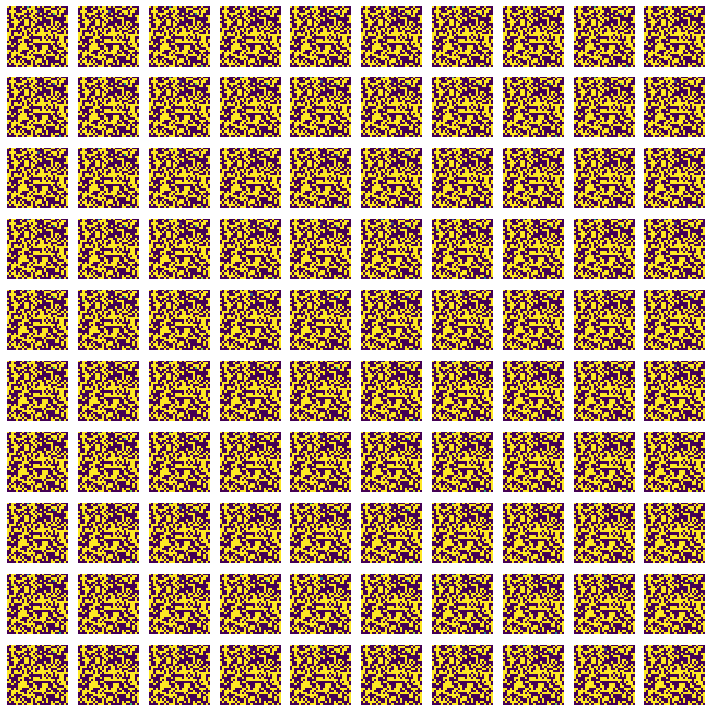

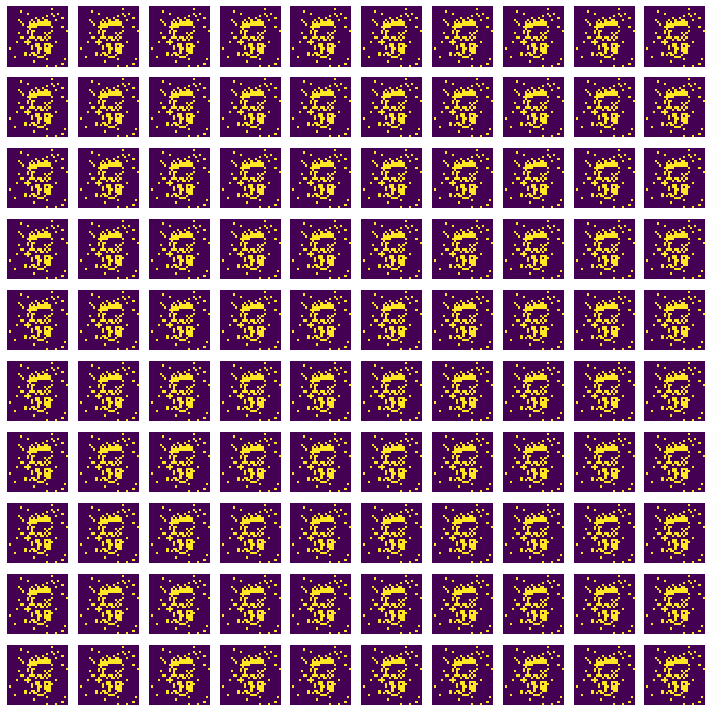

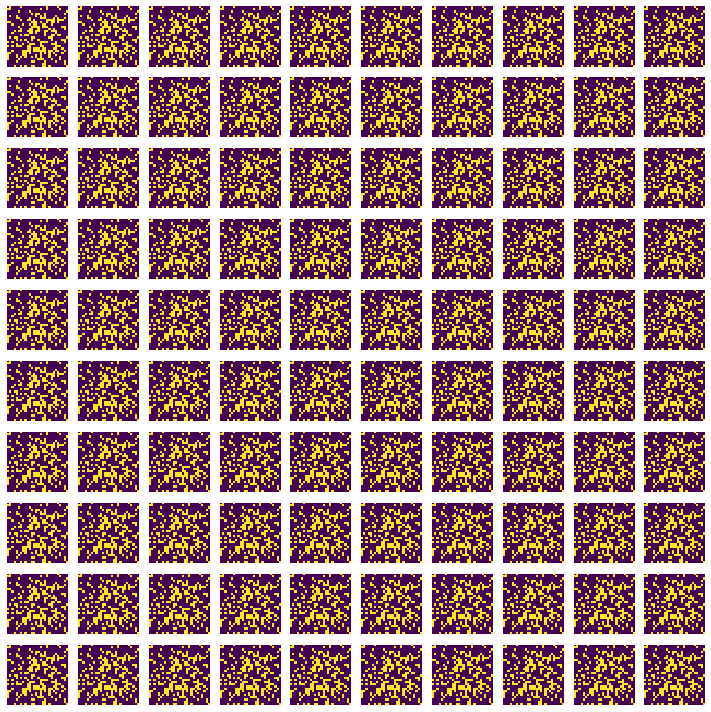

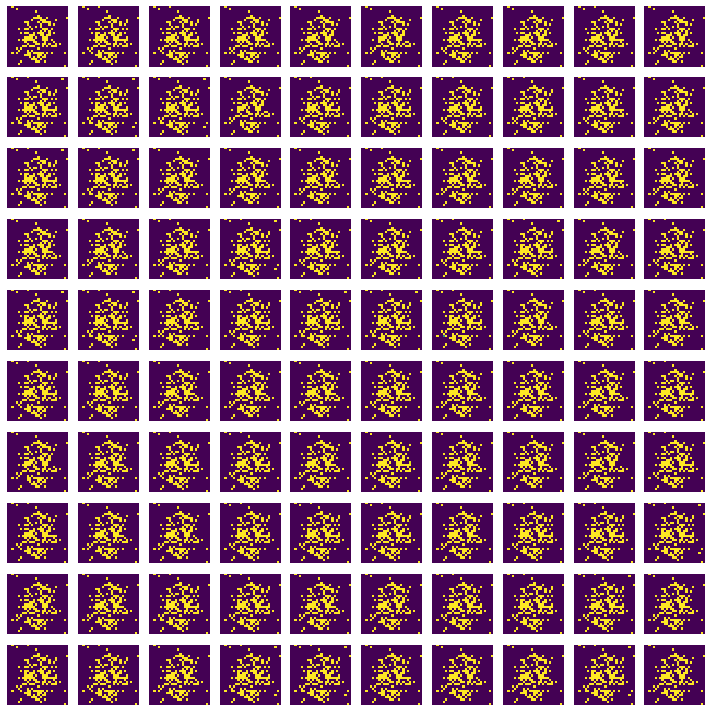

In [ ]:
def training(epochs=400, batch_size=128):
    
    #Loading the data
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= build_generator()
    discriminator= build_discriminator()
    gan = create_gan(discriminator, generator)
     
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if e == 1 or e % 20 == 0:
           
            plot_generated_images(e, generator)
training(400,128)

![alt text](https://i.imgur.com/60r1Xcu.jpg)

##### <b>As the output of vanilla GAN is not satisfactory we can try some other techniques. 
Number of epochs can be increased to improve the accuracy

### <b> Build the Deep convolutional Generative Adversarial Model 

<b> Architecture of DCGAN</b>

Main two parts are there in GAN
1.   Generator
2.   Discriminator

![alt text](https://i.imgur.com/tCK4Qm2.png)



####Preparing the Model 1: Deep convolutional Generative Adversarial network

#### <b>Part 1: Generator 

##### Import Libraries

In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import tensorflow as tf
from IPython import display

In [ ]:

(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 500

In [ ]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
train_dataset

<BatchDataset shapes: (None, 28, 28, 1), types: tf.float32>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation,BatchNormalization,LeakyReLU,Conv2DTranspose,Reshape
def generator_model():
    model = Sequential()
    model.add(Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

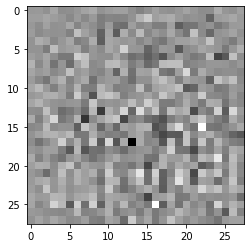

In [ ]:
generator = generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')




#### <b>Part 2: Discriminator

In [ ]:
def discriminator_model():
    model = Sequential()
    model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1))

    return model

In [ ]:
discriminator = discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00017948]], shape=(1, 1), dtype=float32)


#### <b>Part 3: Define the loss and optimizers
Define loss functions and optimizers for both models.


In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy
# This method returns a helper function to compute cross entropy loss
cross_entropy = BinaryCrossentropy(from_logits=True)

- Create the GAN where Generator and Discriminator will be combined.
-  When we train the generator we will freeze the Discriminator.
- We will input the noised image of shape 100 units to the Generator.
- The output generated from the Generator will be fed to the Discriminator.

#### <b>Part 4: Discriminator loss

- This method helps to distinguish between real images from fakes by discriminator.
- Compares the discriminator's predictions on real images to an array of 1s, and the discriminator's predictions on fake (generated) images to an array of 0s

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

#### <b>Part 5: Generator loss

- The generator's loss quantifies how well it was able to trick the discriminator. 
- If the generator is performing well, the discriminator will classify the fake images as real (or 1). Here, we will compare the discriminators decisions on the generated images to an array of 1s.


In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
from tensorflow.keras.optimizers import Adam
generator_optimizer = Adam(1e-4)
discriminator_optimizer = Adam(1e-4)

#### <b>Part 6: Define the parameters

-  Generator receiving a random seed as input.
- That seed is used to produce an image. 
- The discriminator is then used to classify real images (drawn from the training set) and fakes images (produced by the generator).
-  The loss is calculated for each of these models, and the gradients are used to update the generator and discriminator.

In [ ]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

##### <b>As the output of vanilla GAN is not satisfactory we can try some other techniques. 
Number of epochs can be increased to improve the accuracy

<b> Architecture of GAN</b>

Main two parts are there in GAN
1.   Generator
2.   Discriminator

![alt text](https://i.imgur.com/Fg891TJ.png)



#### <b>Part 7: Train the model

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    #if (epoch + 1) % 15 == 0:
      #checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

#### <b>Part 8: Generate and save the model

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

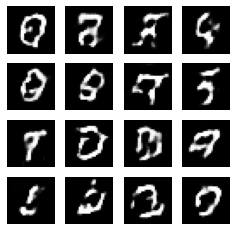

In [ ]:
train(train_dataset, EPOCHS)

#### <b>Part 9: Visualize the Final output

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['display', 'seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


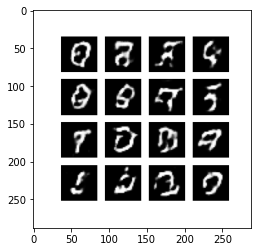

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/image_at_epoch_0050.png')
imgplot = plt.imshow(img)
plt.show()


##### <b> Output of DCGAN is good.

# DIY: Assignment

####**Total Marks: 50**
**Duration: 6 days**

As a part of this assignment following are the list of task that may help  improve your skills with **Autoencoders** and **TensorFlow**. It is important to get hands-on experience with CNN in order to learn how to use it properly.

You may want to backup this Notebook before making any changes.

###**`.ipynb file 1`** 


**Marks: 10**
- Do you get the exact same results if you run the notebook multiple times without changing any parameters?
-What happens if we increase the batch_size?
- What other Activation functions could we use instead of sigmoid?
- Why is the DCGAN output much better than Vanilla GAN? Elaborate

1. Sometimes I get same results, sometimes I don't.

2. If we increase the batch_size, the memory consumption and computation time will increase as the number of images loaded at once will increase. It can also increases the variety included in a step for updating the weights of the model. So, increasing the batch-size too much can affect model performance negatively.

3. TanH can be used in place of sigmoid.

4. Both GAN and DCGAN consist of two models: generator model and discriminator model. The difference between the two is that Vanilla GAN or GAN makes use of fully-connected network whereas DCGAN as the name says focuses on "Deep Convolutional Network". This is the reason why DCGANs performs much better with images dataset such as the MNIST Handwritten digits.

###**`.ipynb file 2`** 


**Marks: 15**
- Try improving the model and re-code the program from scratch without looking too much at this source-code.
- Write up a summary explaining how your program works.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
!pip install -q imageio
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import time

from IPython import display
print(tf.__version__)

2.4.1


In [ ]:
IMG_DIM = 28
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.reshape(train_images.shape[0], IMG_DIM, IMG_DIM, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5

In [ ]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Reshape((7, 7, 256)))
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    return model

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(1))
    return model

In [ ]:
generator = make_generator_model()

In [ ]:
discriminator = make_discriminator_model()

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
EPOCHS = 100
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
def train_step(images):
  noise = tf.random.normal([BATCH_SIZE, noise_dim])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(noise, training=True)

    real_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator, epochs, seed)

In [ ]:
def generate_and_save_images(model, epoch, test_input):
    # Notice `training` is set to False.
    # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(4,4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

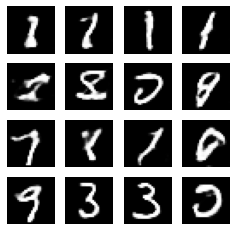

In [ ]:
train(train_dataset, EPOCHS)

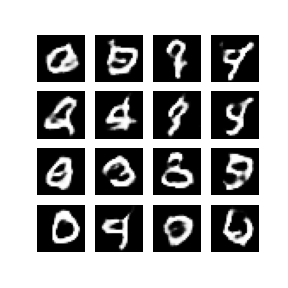

In [ ]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))
display_image(EPOCHS)

In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 2*(i**1.0)
    if round(frame) > round(last):
      last = frame
    else:
      continue
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

import IPython
if IPython.version_info > (6,2,0,''):
  display.Image(filename=anim_file)

### **Explanation**

In this code, we have first defined the generator and discriminator models. Both models consists of Conv Layers with LeakyReLU activation function. Then for each model, loss function is defined. In discriminator loss, loss for true images and fake images is combined. Whereas generator model's loss is only defined using the fake images.

Using GradientTapes, both the models are trained for 100 epochs. In a training step, we first generate the a fake image using generator function. Then the true image and fake image is fed to the discriminator model one by one. The discriminator model returns the output to classify whether the input image is real or fake. 

Using the o/p(s) of discriminator model, update the loss of the model by adding them to the GradientTape and then updating the network weights based on the gradients of the loss.


###**`.ipynb file 3`** 

**Marks: 25**

**Problem Statement**<br>
The dataset is similar to MNIST, but includes images of certain clothing and accessory. The objective is to add some noise to the images and then, use an Autoencoder to desnoise images .<br>
<br>
**Dataset Description**
- Total Images: 70,000 
- Train Images: 60,000 
- Test Images: 10,000 
- Image Size: 28 X 28 
- Classes: 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot' 

**Tasks to be Performed:**
As a part of this assignment you will be performing the following tasks:
- Prepare a detailed python notebook using an Autoencoder to denoise images from MNIST Fashion Dataset
- Perform Data Visualization
- Prepare the dataset for the model (add noise to the images)
- Build and Train Autoencoder model
- Evaluate Trained model performance
- Display the denoised Images

 

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_val_images, train_val_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_val_images = train_val_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
train_val_images = train_val_images.reshape(60000,784)
test_images = test_images.reshape(10000,784)

In [ ]:
train_images = train_val_images[:50000]
val_images = train_val_images[50000:]

train_labels = train_val_labels[:50000]
val_labels = train_val_labels[50000:]

In [ ]:
print(train_images.shape)
print(val_images.shape)
print(test_images.shape)

(50000, 784)
(10000, 784)
(10000, 784)


In [ ]:
def plot_images(image_set1, image_set2, title1, title2):
  for i in range(5):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(image_set1[i].reshape(28, 28), cmap='gray')
    ax1.axes.xaxis.set_ticks([])
    ax1.axes.yaxis.set_ticks([])
    if i == 0:
      ax1.set_title(title1)
    ax2.imshow(image_set2[i].reshape(28, 28), cmap='gray')
    ax2.axes.xaxis.set_ticks([])
    ax2.axes.yaxis.set_ticks([])
    if i == 0:
      ax2.set_title(title2)

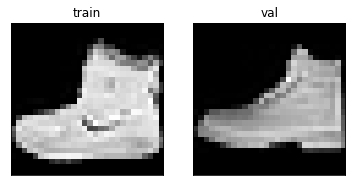

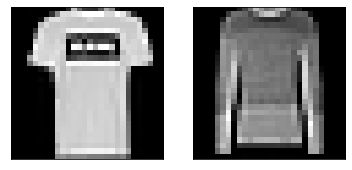

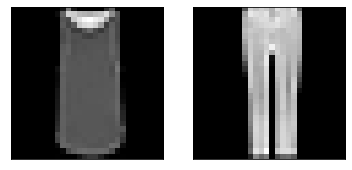

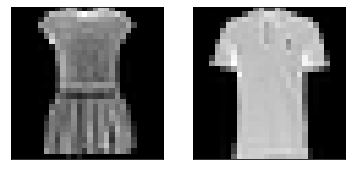

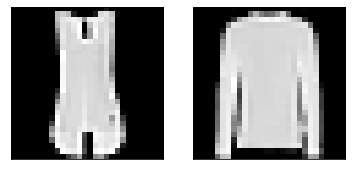

In [ ]:
plot_images(train_images, val_images, 'train', 'val')

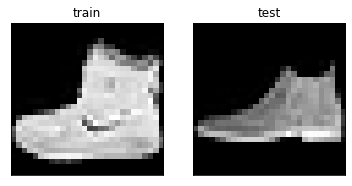

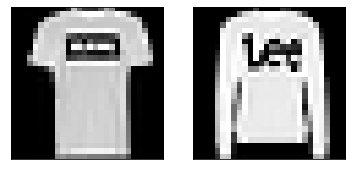

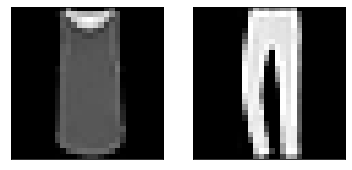

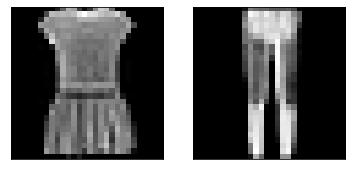

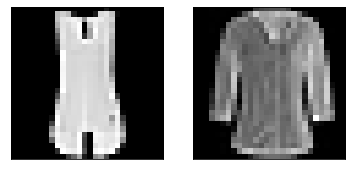

In [ ]:
plot_images(train_images, test_images, 'train', 'test')

In [ ]:
def add_noise(x, noise_factor=0.2):
    x = x + np.random.randn(*x.shape) * noise_factor
    x = x.clip(0., 1.)
    return x
    
X_train_noisy = add_noise(train_images)
X_val_noisy = add_noise(val_images)
X_test_noisy  = add_noise(test_images)

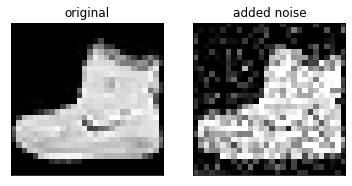

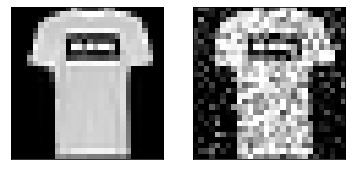

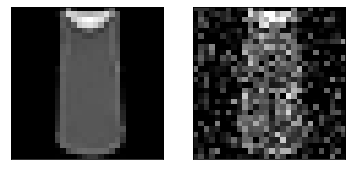

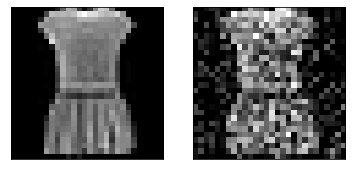

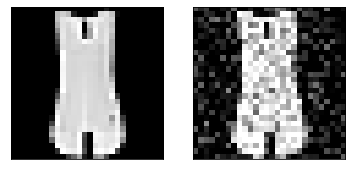

In [ ]:
plot_images(train_images, X_train_noisy, 'original', 'added noise')

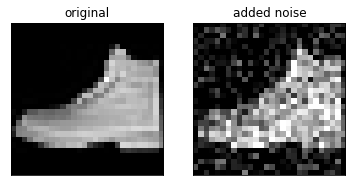

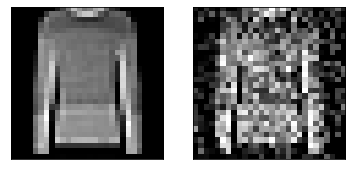

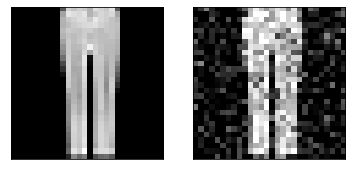

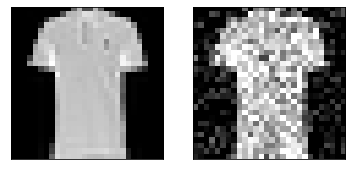

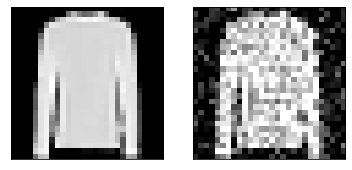

In [ ]:
plot_images(val_images, X_val_noisy, 'original', 'added noise')

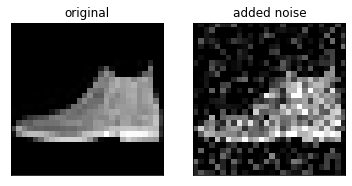

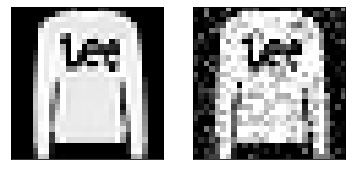

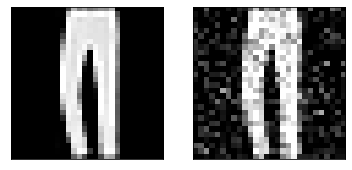

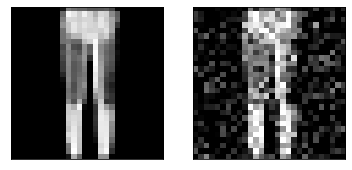

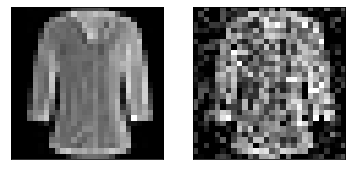

In [ ]:
plot_images(test_images, X_test_noisy, 'original', 'added noise')

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

input_image = Input(shape = (784, ) ) 
 
encoded = Dense(512, activation = 'relu')(input_image) 
encoded = Dense(512, activation = 'relu')(encoded) 
encoded = Dense(256, activation = 'relu')(encoded) 
encoded = Dense(256, activation = 'relu')(encoded) 
encoded = Dense(64, activation = 'relu')(encoded) 
 
decoded = Dense(512, activation = 'relu')(encoded) 
decoded = Dense(784, activation = 'sigmoid')(decoded) 
 
autoencoder = Model(input_image, decoded)
autoencoder.compile(loss= 'binary_crossentropy' , optimizer = 'adam') 
autoencoder.summary() 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 512)               33280 

In [ ]:
history = autoencoder.fit(X_train_noisy, train_images,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(X_val_noisy, val_images))

Epoch 1/50
391/391 [==============================] - 6s 8ms/step - loss: 0.4016 - val_loss: 0.3084
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 0.3035 - val_loss: 0.2975
Epoch 3/50
391/391 [==============================] - 2s 6ms/step - loss: 0.2940 - val_loss: 0.2921
Epoch 4/50
391/391 [==============================] - 2s 6ms/step - loss: 0.2887 - val_loss: 0.2914
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 0.2858 - val_loss: 0.2855
Epoch 6/50
391/391 [==============================] - 3s 6ms/step - loss: 0.2833 - val_loss: 0.2840
Epoch 7/50
391/391 [==============================] - 2s 6ms/step - loss: 0.2809 - val_loss: 0.2843
Epoch 8/50
391/391 [==============================] - 2s 6ms/step - loss: 0.2795 - val_loss: 0.2813
Epoch 9/50
391/391 [==============================] - 2s 6ms/step - loss: 0.2778 - val_loss: 0.2806
Epoch 10/50
391/391 [==============================] - 2s 6ms/step - loss: 0.2763 - val_loss: 0.2797

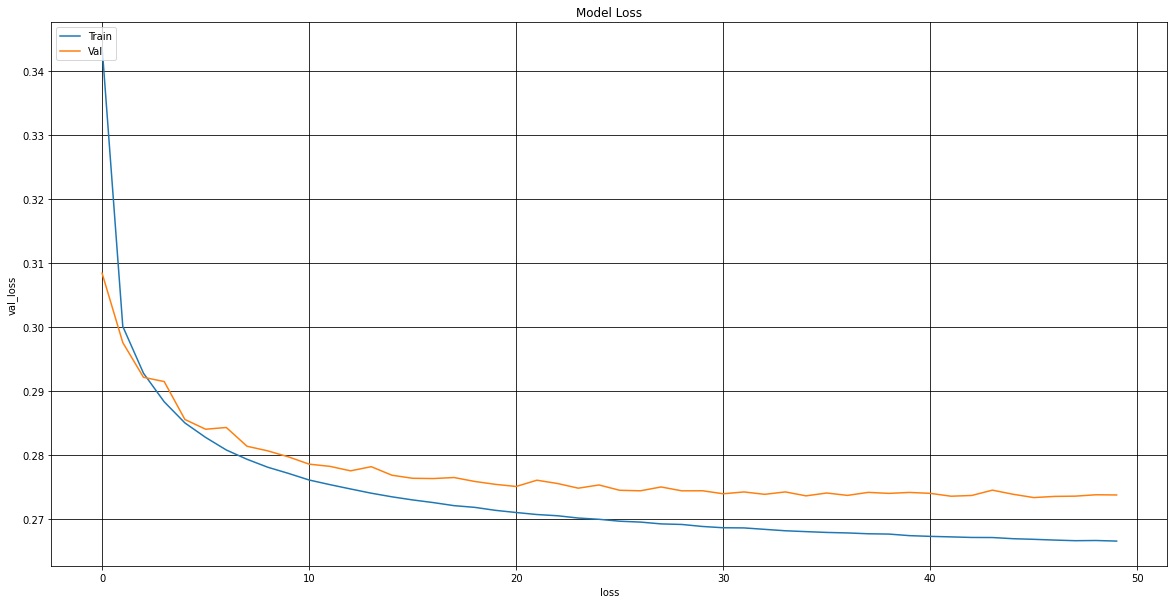

In [ ]:
x = 'loss' 
y = 'val_loss'
fig, ax = plt.subplots( figsize=(20,10)) 
ax.plot(history.history[x]) 
ax.plot(history.history[y]) 
plt.title('Model Loss') 
plt.ylabel(y) 
plt.xlabel(x) 
plt.legend(['Train', 'Val'], loc='upper left') 
ax.grid(color='black') 
plt.show() 

In [ ]:
decoded_imgs = autoencoder.predict(X_val_noisy)

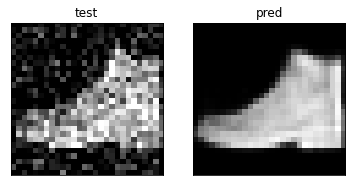

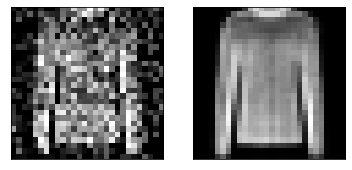

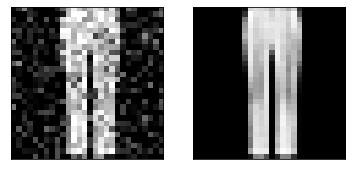

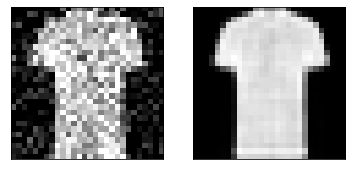

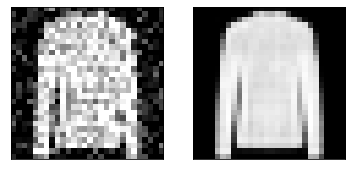

In [ ]:
plot_images(X_val_noisy, decoded_imgs, 'test', 'pred')